## Preprocessing

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"],inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_count = application_df["APPLICATION_TYPE"].value_counts()
app_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = app_count.index[8:]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_count = application_df["CLASSIFICATION"].value_counts()
class_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts > 1
class_count[class_count > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_count[class_count < 2].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Other       26
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: count, dtype: int64

In [11]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies_df = pd.get_dummies(application_df[["APPLICATION_TYPE","AFFILIATION","CLASSIFICATION","USE_CASE","ORGANIZATION","INCOME_AMT","SPECIAL_CONSIDERATIONS"]])
application_df.drop(columns=["APPLICATION_TYPE","AFFILIATION","CLASSIFICATION","USE_CASE","ORGANIZATION","INCOME_AMT","SPECIAL_CONSIDERATIONS"],inplace=True)
application_dummies_df = pd.merge(application_df, application_dummies_df, how="inner",left_index=True,right_index=True)
application_dummies_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_dummies_df['IS_SUCCESSFUL']

# Separate the X variable, the features
X = application_dummies_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,train_size=0.85)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
layer1 =  80
layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\rmt20\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,181 (35.86 KB)

 Trainable params: 9,181 (35.86 KB)

 Non-trainable params: 0 (0.00 B)

In [514]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [515]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 737us/step - accuracy: 0.7006 - loss: 0.5882
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.7299 - loss: 0.5550
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7301 - loss: 0.5505
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.7350 - loss: 0.5498
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.7322 - loss: 0.5497
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.7360 - loss: 0.5445
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7350 - loss: 0.5466
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.7330 - loss: 0.5451
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.7356 - loss: 0.5450
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.7327 - loss: 0.5452
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.7321 - loss: 0.5493
Epoch 12/100
804/80

In [517]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 647us/step - accuracy: 0.7290 - loss: 0.5582
Loss: 0.5582443475723267, Accuracy: 0.7289795875549316


In [16]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5", save_format='h5')

# Increase Number of Layers

In [1074]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
layer1 =  80
layer2 = 30
layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\rmt20\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_578 (Dense)               │ (None, 80)             │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_579 (Dense)               │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_580 (Dense)               │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_581 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,471 (37.00 KB)

 Trainable params: 9,471 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1075]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1076]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.7030 - loss: 0.5890
Epoch 2/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7325 - loss: 0.5494
Epoch 3/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7260 - loss: 0.5510
Epoch 4/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.7333 - loss: 0.5449
Epoch 5/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.7394 - loss: 0.5404
Epoch 6/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.7320 - loss: 0.5433
Epoch 7/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.7353 - loss: 0.5443
Epoch 8/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.7341 - loss: 0.5438
Epoch 9/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.7414 - loss: 0.5346
Epoch 10/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.7408 - loss: 0.5365
Epoch 11/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.7413 - loss: 0.5374
Epoch 12/100
912/912 

In [456]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7287 - loss: 0.5594
Loss: 0.5594280362129211, Accuracy: 0.7287463545799255


### Increase Layers(n=80,30,10,1): 0.7287463545799255

# Increase Number of Neurons

In [1137]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
layer1 =  120
layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\rmt20\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_594 (Dense)               │ (None, 120)            │        10,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_595 (Dense)               │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_596 (Dense)               │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,961 (58.44 KB)

 Trainable params: 14,961 (58.44 KB)

 Non-trainable params: 0 (0.00 B)

In [1139]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1140]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.7185 - loss: 0.5764
Epoch 2/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7355 - loss: 0.5482
Epoch 3/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.7320 - loss: 0.5492
Epoch 4/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.7296 - loss: 0.5467
Epoch 5/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.7326 - loss: 0.5446
Epoch 6/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7294 - loss: 0.5472
Epoch 7/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.7318 - loss: 0.5477
Epoch 8/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.7346 - loss: 0.5414
Epoch 9/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7381 - loss: 0.5393
Epoch 10/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.7423 - loss: 0.5337
Epoch 11/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.7349 - loss: 0.5392
Epoch 12/100
912/91

In [1141]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

161/161 - 0s - 1ms/step - accuracy: 0.7275 - loss: 0.5691
Loss: 0.5690823793411255, Accuracy: 0.7275024056434631


### Increase Neurons(n=100,40): 0.7278134226799011
### Increase Neurons(n=120,40): 0.7275024056434631
### Increase Neurons(n=100,60): 0.7263362407684326

# Change Activation Functions


In [1171]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
layer1 =  80
layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_603 (Dense)               │ (None, 80)             │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_604 (Dense)               │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_605 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,181 (35.86 KB)

 Trainable params: 9,181 (35.86 KB)

 Non-trainable params: 0 (0.00 B)

In [1172]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1173]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.6802 - loss: 1.5002
Epoch 2/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.7167 - loss: 1.0852
Epoch 3/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.7113 - loss: 0.9528
Epoch 4/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.6975 - loss: 0.9799
Epoch 5/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.7304 - loss: 0.7589
Epoch 6/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7293 - loss: 0.7471
Epoch 7/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.7299 - loss: 0.8465
Epoch 8/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.7196 - loss: 0.7866
Epoch 9/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.7311 - loss: 0.7137
Epoch 10/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.7255 - loss: 0.7226
Epoch 11/100
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.7141 - loss: 0.7431
Epoch 12/100
912/91

In [1174]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

161/161 - 0s - 1ms/step - accuracy: 0.7304 - loss: 0.6303
Loss: 0.6303449273109436, Accuracy: 0.7304179072380066


### Change Activation Functions(f="relu","relu","tanh"): 0.7296404242515564
### Change Activation Functions(f="relu","relu","relu"): 0.7304179072380066

# Final Attempt at Optimization

- Kept the top 8 application types and put the rest as others
- Put all classification types whose value_count = 1 as others
- Added an additional hidden layer
- Changed number of neurons to 100, 40, 10, 1
- Increased epochs to 150

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
layer1 = 100
layer2 = 40
layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         4,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,861 (50.24 KB)

 Trainable params: 12,861 (50.24 KB)

 Non-trainable params: 0 (0.00 B)

In [1366]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1367]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150)

Epoch 1/150


912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.7018 - loss: 0.5960
Epoch 2/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.7350 - loss: 0.5485
Epoch 3/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.7315 - loss: 0.5468
Epoch 4/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.7339 - loss: 0.5459
Epoch 5/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.7357 - loss: 0.5421
Epoch 6/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7342 - loss: 0.5463
Epoch 7/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.7347 - loss: 0.5470
Epoch 8/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.7361 - loss: 0.5406
Epoch 9/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.7325 - loss: 0.5448
Epoch 10/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.7377 - loss: 0.5426
Epoch 11/150
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.7351 - loss: 0.5410
Epoch 12/150
912/912 ━━━━━━━━━━

In [1368]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

161/161 - 0s - 1ms/step - accuracy: 0.7306 - loss: 0.5745
Loss: 0.5745279788970947, Accuracy: 0.7306122183799744


In [18]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5", save_format='h5')

# Look at Training History Here
### Run desired model beforehand.

<Axes: >

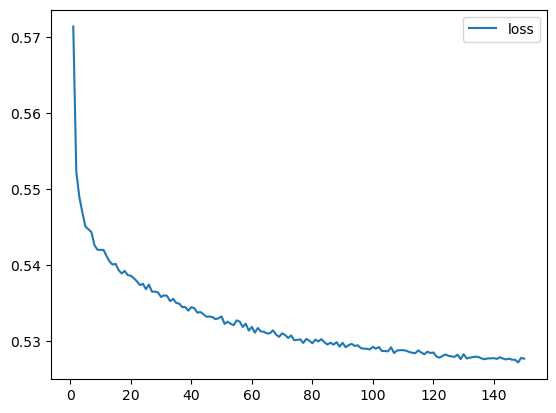

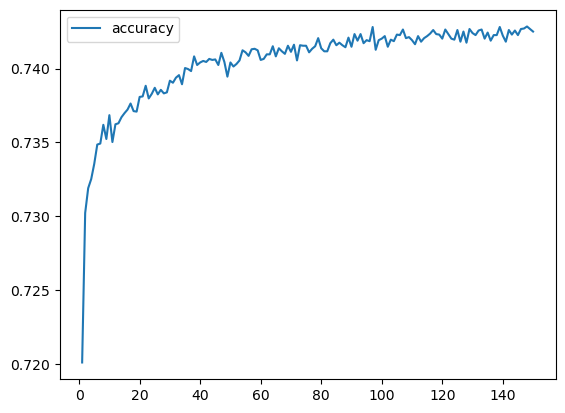

In [1370]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the graphs
history_df.plot(y="loss")
history_df.plot(y="accuracy")